<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B5%AC%EC%94%A8%EB%A5%BC_%EC%B0%BE%EC%95%84%EB%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석



---



## 3.구씨를 찾아라! EDA 분석하기

### 3-1.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.데이터 다운로드하기

- 국가통계포털 사이트  https://kosis.kr/index/index.do
- 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - ./sample_data/성씨ㆍ본관별_인구__시군구_20230510101129.csv

---

### 2.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [4]:
df=pd.read_csv('./sample_data/성씨ㆍ본관별_인구__시군구_20230829110908.csv',encoding='cp949')
df


,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


---

### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

#### @컬럼이름 변경하기

In [5]:
# 현재 컬럼이름 출력하기
df.columns

Index(['성씨, 본관별', '행정구역별(시군구)', '2015'], dtype='object')

In [6]:
# 컬럼이름 변경하기
df.columns = ['성씨', '지역', '인구']
df.columns
df.head(2)

,성씨,지역,인구
0,계,전국,49705663
1,계,서울특별시,9567196


#### @고유한 성씨만 출력하기

In [ ]:
# 고유한(성격,타입) 성씨(한자포함) 집합으로 출력하기
set(df['성씨'])

In [8]:
# 고유한 성씨(한자포함) 총개수 출력하기

len(set(df['성씨']))

155

In [ ]:
# 성=[]
# for name in set(df['성씨']):
#     성=list(name.split('('))

In [9]:
# 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기
familyname = set(name.split('(')[0] for name in set(df['성씨']) ) # for문 먼저 확인하기 괄호'('를 기준으로 split [0]은 기준 앞쪽, [1]은 기준 뒷쪽
print(f'한글 성씨 목록: {familyname}') # 순서대로 하려면 list로 받아서 sort 해야 함 / set은 순서가 없음

# 고유한 한글 성씨 총개수 출력하기
print(f'한글 성씨 개수: {len(familyname)}')

한글 성씨 목록: {'좌', '구', '서문', '허', '한', '표', '안', '송', '경', '임', '엄', '원', '공', '금', '인', '라', '빈', '홍', '노', '방', '선우', '문', '추', '동', '제', '호', '편', '백', '범', '유', '목', '함', '윤', '성', '황', '소', '오', '복', '우', '사공', '형', '진', '가', '곽', '장', '맹', '명', '봉', '감', '부', '지', '기타', '황보', '탁', '채', '온', '민', '변', '여', '갈', '반', '염', '신', '설', '차', '위', '김', '모', '최', '왕', '두', '길', '제갈', '석', '배', '남궁', '연', '은', '피', '천', '현', '박', '심', '육', '팽', '마', '단', '상', '사', '선', '고', '당', '국', '도', '류', '서', '옥', '예', '정', '견', '태', '기', '계', '용', '승', '손', '나', '이', '간', '조', '남', '시', '어', '강', '하', '양', '주', '전', '음', '권'}
한글 성씨 개수: 120


---------------------

#### @[성씨]가  '구'인 데이터 추출하기

In [10]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
df[df['성씨'].str.contains('구')]
df.query("성씨.str.contains('구')")

# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_goo=df[df['성씨'].str.contains('구')& (df['지역'] !='전국')]
df_goo=df.query("성씨.str.contains('구') & (지역 !='전국')") # df는 전체 data / df_goo를 지정하기
df_goo

,성씨,지역,인구
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781
257,구(丘),강원도,217


**### [실습문제] 자신의 성씨 데이터 출력하기**


In [12]:
df[df['성씨'].str.contains('이')]
df.query("성씨.str.contains('이')")

df_my=df[df['성씨'].str.contains('이')& (df['지역'] !='전국')]
df_my=df.query("성씨.str.contains('이') & (지역 !='전국')") # df는 전체 data / df_my를 지정하기
df_my



,성씨,지역,인구
1855,이(李),서울특별시,1441796
1856,이(李),부산광역시,469587
1857,이(李),대구광역시,374123
1858,이(李),인천광역시,424803
1859,이(李),광주광역시,179688
1860,이(李),대전광역시,230292
1861,이(李),울산광역시,167221
1862,이(李),세종특별자치시,30455
1863,이(李),경기도,1856028
1864,이(李),강원도,216909


#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [13]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기
# df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=False) # numeric_only=True가 기본 세팅
df_goo_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_goo_group = df_goo_group.sort_values(by = '인구', ascending = False) # ascending = False 내림차순
df_goo_group

,성씨,인구
지역,,
경기도,구(丘)구(具),47572
서울특별시,구(丘)구(具),38857
경상남도,구(丘)구(具),20367
부산광역시,구(丘)구(具),17871
대구광역시,구(丘)구(具),15313
인천광역시,구(丘)구(具),12028
충청남도,구(丘)구(具),10061
경상북도,구(丘)구(具),10000
대전광역시,구(丘)구(具),6295


**### [실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [14]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기

df_my_group = df_my.groupby('지역').sum(numeric_only=False) # numeric_only=True가 기본 세팅
df_my_group = df_my_group.sort_values(by = '인구', ascending = False) # ascending = False 내림차순
df_my_group


,성씨,인구
지역,,
경기도,이(李),1856028
서울특별시,이(李),1441796
부산광역시,이(李),469587
경상남도,이(李),441464
인천광역시,이(李),424803
경상북도,이(李),391378
대구광역시,이(李),374123
충청남도,이(李),327336
전라북도,이(李),251483


---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (28.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [1]:
#[코랩용 한글]
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')        # 방법1
plt.rcParams['font.family'] = 'NanumBarunGothic' # 방법2

In [15]:
df_goo_group.columns # 지역은 인덱스

Index(['성씨', '인구'], dtype='object')

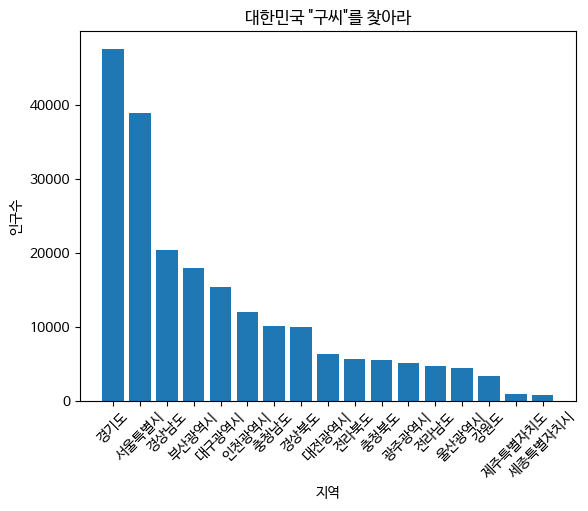

In [16]:
import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index  # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
plt.xlabel('지역')                    # x축 이름
plt.ylabel('인구수')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

### [실습문제]  (코랩) 그래프에서 한글이 깨져서 보입니다. 한글이 나타나도록 만들어보세요.

In [ ]:
# 1. (코랩) 한글 폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 코랩에서 위 코드를 실행시킨 후  반드시 코랩(Colab)의 런타임을 재시작 합니다.

# 3. 런타입 후에는 앞에서 실행한 셀을 다시 실행해야한다.
#    (메모리에 있던 정보가 재실행하면 없어졌기때문에)

# 4. 한글폰트 지정하기
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')


#### @그래프 꾸미기

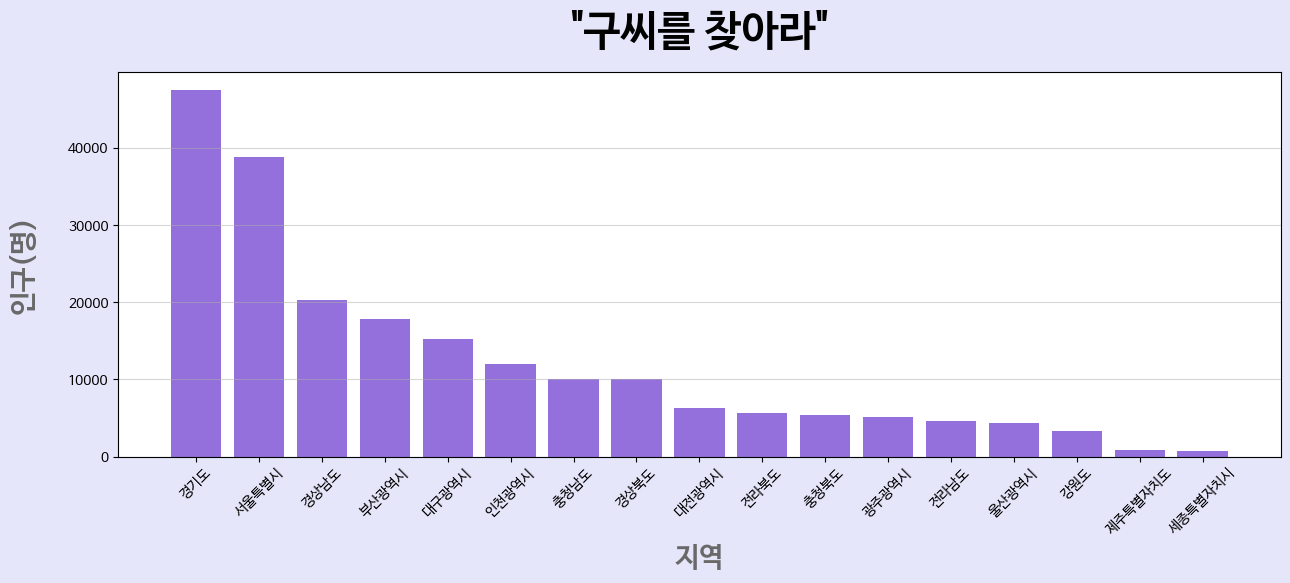

In [17]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index  # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @선 그래프로 시각화하기

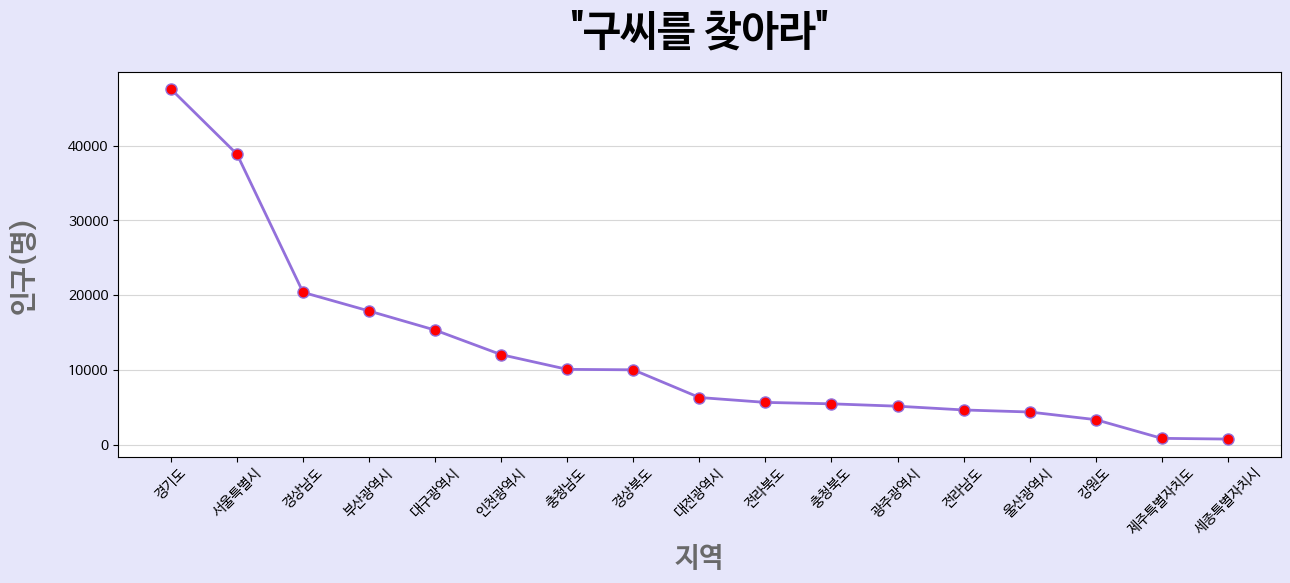

In [18]:
import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index  # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @혼합 그래프

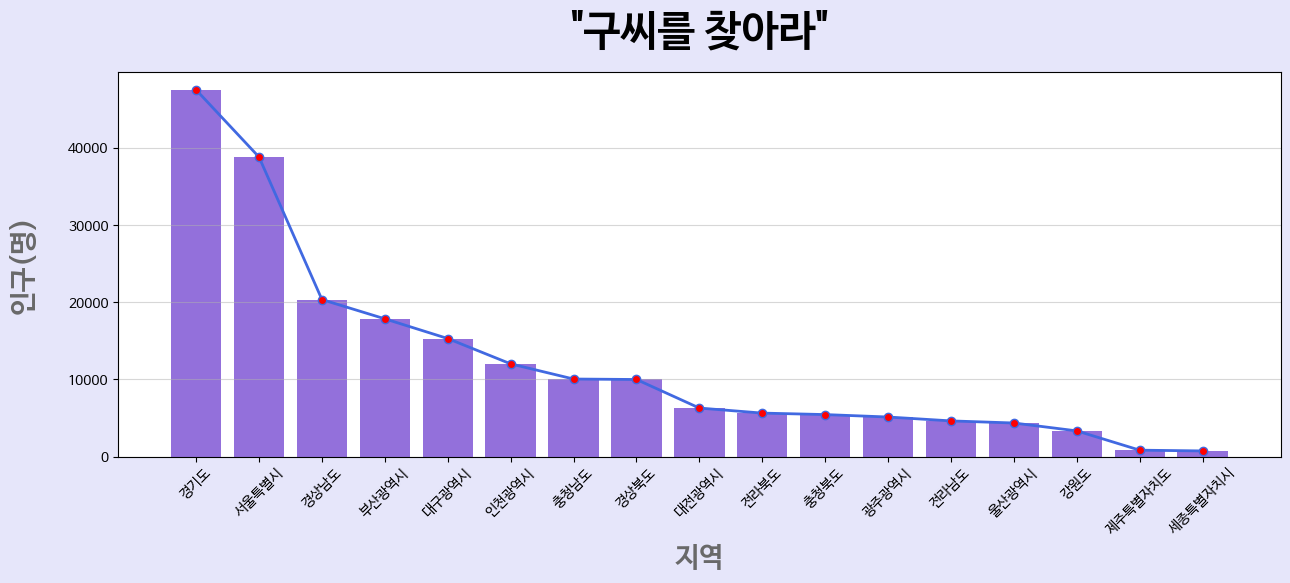

In [19]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index  # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [20]:
# 파일명 지정하여 저장하기
file = './sample_data/family_name_goo.csv'  # 파일명
df_goo_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

-----------------------------------------

**### [실습문제] 워드클라우드로 시각화하기**

In [21]:
# 라이브러리 설치하기
!pip install wordcloud

{'경기도': 47572, '서울특별시': 38857, '경상남도': 20367, '부산광역시': 17871, '대구광역시': 15313, '인천광역시': 12028, '충청남도': 10061, '경상북도': 10000, '대전광역시': 6295, '전라북도': 5640, '충청북도': 5449, '광주광역시': 5132, '전라남도': 4628, '울산광역시': 4355, '강원도': 3332, '제주특별자치도': 830, '세종특별자치시': 732}


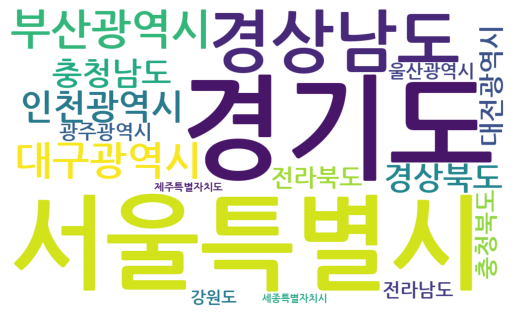

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_goo_group.index     # 지역
counts = df_goo_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 <<딕셔너리>> 형태로 만들기
print(data) # 딕셔너리 형태인지 확인

# 3.워드클라우드 그래프로 시각화하기 / 데이터는 딕셔너리 형태만 가능
wc = WordCloud(width = 1000, height = 600,
               background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./sample_data/구씨_워드클라우드.png')



---



### **[[미션]] **
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

In [25]:
df_my_group
file = './sample_data/family_name_my.csv'  # 파일명
df_my_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기



{'경기도': 1856028, '서울특별시': 1441796, '부산광역시': 469587, '경상남도': 441464, '인천광역시': 424803, '경상북도': 391378, '대구광역시': 374123, '충청남도': 327336, '전라북도': 251483, '충청북도': 237914, '대전광역시': 230292, '강원도': 216909, '전라남도': 205798, '광주광역시': 179688, '울산광역시': 167221, '제주특별자치도': 60553, '세종특별자치시': 30455}


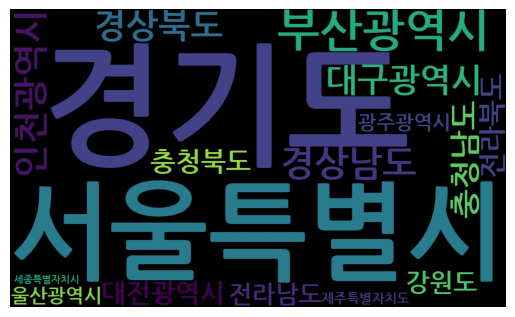

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_my_group.index     # 지역
counts = df_my_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 <<딕셔너리>> 형태로 만들기
print(data) # 딕셔너리 형태인지 확인

# 3.워드클라우드 그래프로 시각화하기 / 데이터는 딕셔너리 형태만 가능
wc = WordCloud(width = 1000, height = 600,
               background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./sample_data/마이_워드클라우드.png')

----------------------------------

THE END